In [1]:
# Shoonhsin Li
# 02/10/2022

import pandas as pd
from os import listdir
from os.path import isfile, join
import csv

"""
Some important details:

- this works for the directory path in my Box drive using os, so otherwise change mypath variable
- I took the absolute value of the average in both graph and text file
- Files are not in any particular order except the default for listdir

"""
mypath = 'PMN_thresholdpos_allthresholdcombinations'
filenames = [f for f in listdir(mypath) if isfile(join(mypath, f))] # only adds the files
totals = []
avgs = []
counts = []
nums = [str(i) for i in list(range(0, 10))]

point85filenames=[]

# find avg and count for each file
for filename in filenames:
    
    # determine average number
    split_lst = filename.split("_")
    total = 0
    n = 0
    for split in split_lst:
        if "-" in split and split[-1] in nums: # confirm that the substring is a negative number
            n += 1
            total += float(split)
    totals.append(abs(total))
    avgs.append(abs(total / n))
    

    
    # determine number of lines
    with open(join(mypath, filename), 'r') as f:
        count = -1 # account for first row
        for line in f:
            count += 1
    counts.append(count)
    
    if abs(total / n)>=0.9:
        point85filenames.append(filename)
# write text file with 1st column avgs and 2nd column counts
L = zip(avgs, counts) # list of lists of the avg, count per file
with open("Shoonhsin_avg_and_linecount.csv", 'w', newline='') as f1:
    writer= csv.writer(f1, delimiter='\t')
    writer.writerow(["Average value", "Line count"])
    writer.writerows(L)


In [2]:
point85filenames

['g1_PMN_g2_MyloidPMN_-0.9_int_g1_PMN_g2_NaiveT_B_NKPMN_-0.9_int_g1_PMN_g2_PMNlikePMN_-0.9_int_g1_PMN_g2_effectorPMN_-0.9']

In [3]:
def condition(x): return x >= 0.8
avggreaterpont7index = [idx for idx, element in enumerate(avgs) if condition(element)]
#print(avggreaterpont7index)

avggreaterpont7=[avgs[index] for index in avggreaterpont7index]
countspoint7=[counts[index] for index in avggreaterpont7index]

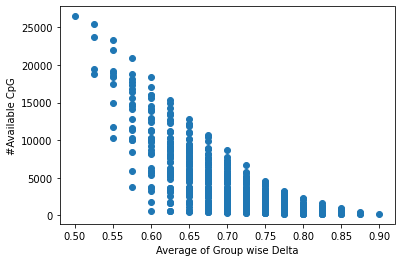

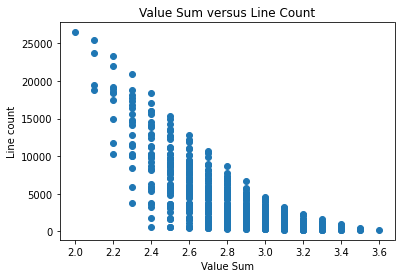

In [4]:
# make plot with average value
import matplotlib.pyplot as plt

#plt.semilogy(avgs, counts, 'o')
plt.plot(avgs, counts, 'o')

#plt.yscale('log')
#plt.title("Average Value versus Line Count")
plt.xlabel("Average of Group wise Delta")
plt.ylabel("#Available CpG")
plt.savefig("avg_linecount_plot.pdf")
plt.show()

# make plot with value sum
#plt.semilogy(totals, counts, 'o')
plt.plot(totals, counts, 'o')
plt.title("Value Sum versus Line Count")
plt.xlabel("Value Sum")
plt.ylabel("Line count")
plt.savefig("sum_linecount_plot.pdf")
plt.show()

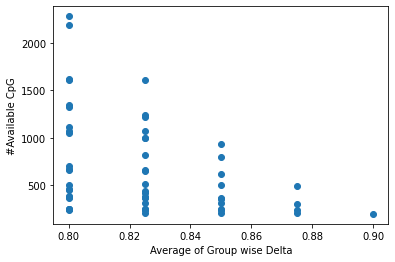

In [5]:
#plt.semilogy(avgs, counts, 'o')
plt.plot(avggreaterpont7, countspoint7, 'o')

#plt.yscale('log')
plt.xlabel("Average of Group wise Delta")
plt.ylabel("#Available CpG")
plt.savefig("zoomed_avg_linecount_plot.pdf")
plt.show()